In [1]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('gender-classifier-DFE-791531.csv',encoding = "ISO-8859-1")

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [4]:
df.corr()

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
_unit_id,1.000000,0.208055,0.207651,0.007918,0.015168,0.024878,-0.004337,-0.024809,0.844887
_golden,0.208055,1.000000,0.998592,0.008818,0.005592,0.003794,-0.000744,-0.009669,-0.005985
_trusted_judgments,0.207651,0.998592,1.000000,0.009550,0.005543,0.003851,-0.000765,-0.009703,-0.005781
gender:confidence,0.007918,0.008818,0.009550,1.000000,0.313628,-0.030889,-0.004947,-0.013558,0.027901
profile_yn:confidence,0.015168,0.005592,0.005543,0.313628,1.000000,-0.003256,0.001376,-0.012665,0.019044
fav_number,0.024878,0.003794,0.003851,-0.030889,-0.003256,1.000000,0.008274,0.066733,0.041788
retweet_count,-0.004337,-0.000744,-0.000765,-0.004947,0.001376,0.008274,1.000000,-0.001263,-0.006466
tweet_count,-0.024809,-0.009669,-0.009703,-0.013558,-0.012665,0.066733,-0.001263,1.000000,-0.037836
tweet_id,0.844887,-0.005985,-0.005781,0.027901,0.019044,0.041788,-0.006466,-0.037836,1.000000


In [5]:
df.gender.unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

In [6]:
df = df.dropna(subset=['gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19953 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               19953 non-null  int64  
 1   _golden                19953 non-null  bool   
 2   _unit_state            19953 non-null  object 
 3   _trusted_judgments     19953 non-null  int64  
 4   _last_judgment_at      19903 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      19953 non-null  float64
 7   profile_yn             19953 non-null  object 
 8   profile_yn:confidence  19953 non-null  float64
 9   created                19953 non-null  object 
 10  description            16224 non-null  object 
 11  fav_number             19953 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             19953 non-null  object 
 14  name                   19953 non-null  object 
 15  pr

In [7]:
df = df[df.gender != 'unknown']
df.gender.unique()

array(['male', 'female', 'brand'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               18836 non-null  int64  
 1   _golden                18836 non-null  bool   
 2   _unit_state            18836 non-null  object 
 3   _trusted_judgments     18836 non-null  int64  
 4   _last_judgment_at      18786 non-null  object 
 5   gender                 18836 non-null  object 
 6   gender:confidence      18836 non-null  float64
 7   profile_yn             18836 non-null  object 
 8   profile_yn:confidence  18836 non-null  float64
 9   created                18836 non-null  object 
 10  description            15522 non-null  object 
 11  fav_number             18836 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             18836 non-null  object 
 14  name                   18836 non-null  object 
 15  pr

In [9]:
df=df[(df['gender:confidence'] >= 0.8)&(df['profile_yn:confidence'] >= 0.8)]
df = df[df.gender != 'brand']

In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10029 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               10029 non-null  int64  
 1   _golden                10029 non-null  bool   
 2   _unit_state            10029 non-null  object 
 3   _trusted_judgments     10029 non-null  int64  
 4   _last_judgment_at      9996 non-null   object 
 5   gender                 10029 non-null  object 
 6   gender:confidence      10029 non-null  float64
 7   profile_yn             10029 non-null  object 
 8   profile_yn:confidence  10029 non-null  float64
 9   created                10029 non-null  object 
 10  description            8775 non-null   object 
 11  fav_number             10029 non-null  int64  
 12  gender_gold            33 non-null     object 
 13  link_color             10029 non-null  object 
 14  name                   10029 non-null  object 
 15  pr

_unit_id                    0
_golden                     0
_unit_state                 0
_trusted_judgments          0
_last_judgment_at          33
gender                      0
gender:confidence           0
profile_yn                  0
profile_yn:confidence       0
created                     0
description              1254
fav_number                  0
gender_gold              9996
link_color                  0
name                        0
profile_yn_gold          9996
profileimage                0
retweet_count               0
sidebar_color               0
text                        0
tweet_coord              9967
tweet_count                 0
tweet_created               0
tweet_id                    0
tweet_location           3132
user_timezone            3339
dtype: int64

In [11]:
#drop all columns with so many of unique value to simpify the dataset
df=df.drop('gender_gold',axis=1)
df=df.drop('profile_yn_gold',axis=1)
df=df.drop('tweet_coord',axis=1)
df=df.drop('tweet_location',axis=1)
df=df.drop('user_timezone',axis=1)
df=df.drop('_unit_id',axis=1)
df=df.drop('_last_judgment_at',axis=1)
df=df.drop('created',axis=1)
df=df.drop('name',axis=1)
df=df.drop('profileimage',axis=1)
df=df.drop('tweet_created',axis=1)
df=df.drop('_trusted_judgments',axis=1)
df=df.drop('gender:confidence',axis=1)
df=df.drop('profile_yn:confidence',axis=1)
df=df.drop('_golden',axis=1)
df=df.drop('text',axis=1)
df=df.drop('description',axis=1)
df=df.drop('link_color',axis=1)
df.isnull().sum()

_unit_state      0
gender           0
profile_yn       0
fav_number       0
retweet_count    0
sidebar_color    0
tweet_count      0
tweet_id         0
dtype: int64

In [12]:
df.nunique().sum

<bound method Series.sum of _unit_state         2
gender              2
profile_yn          1
fav_number       5083
retweet_count      14
sidebar_color     369
tweet_count      8018
tweet_id            2
dtype: int64>

In [13]:
df['sidebar_color'] = df.sidebar_color.str[0] 

In [14]:
dummies= pd.get_dummies(df[['_unit_state','profile_yn','sidebar_color','tweet_id']],drop_first=True)
df=pd.concat([df.drop(['_unit_state','profile_yn','sidebar_color','tweet_id'], axis=1), dummies],axis=1) 

In [15]:
df.gender = df.gender.replace({'male': 1, 'female': 0})

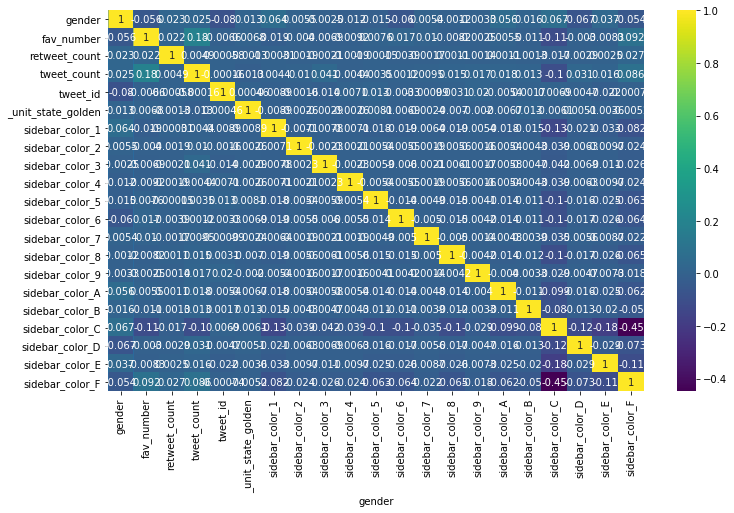

In [16]:
df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
sns.distplot(df['gender'],kde=False,bins=40)

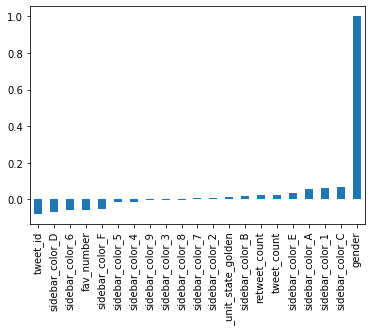

In [17]:
df.corr()['gender'].sort_values().plot(kind='bar')

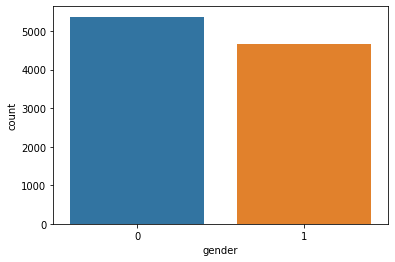

In [18]:
sns.countplot(x='gender',data=df)

plt.figure(figsize=(13,6))
df.corr()['gender'].sort_values().plot(kind='bar')

In [19]:
x = df.drop('gender',axis=1).values
y = df['gender'].values

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

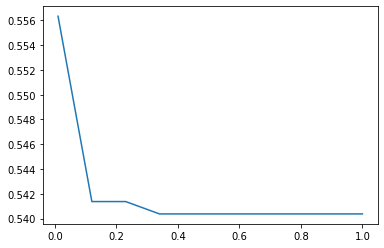

In [22]:
scores=[]
for i in (np.linspace(0.01,1,10)):
  classifier = SVC(kernel = 'linear', C = i)
  classifier.fit(x_train,y_train) 
  scores.append(classifier.score(x_test,y_test)) 
plt.plot(np.linspace(0.01,1,10),scores) 
plt.show()


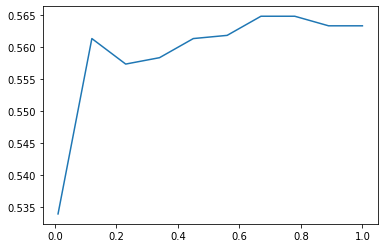

In [23]:
scores=[]
for i in (np.linspace(0.01,1,10)):
  classifier = SVC(kernel = 'rbf', gamma=i, C = i)
  classifier.fit(x_train,y_train) 
  scores.append(classifier.score(x_test,y_test)) 
plt.plot(np.linspace(0.01,1,10),scores) 
plt.show()

In [24]:
classifier = SVC(kernel = 'rbf', gamma=0.8, C = 0.8)
classifier.fit(x_train,y_train) 
classifier.score(x_test,y_test) 

0.5648055832502492

In [25]:
predictions = classifier.predict(x_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predictions)) 
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.79      0.66      1071
           1       0.56      0.30      0.39       935

    accuracy                           0.56      2006
   macro avg       0.56      0.55      0.53      2006
weighted avg       0.56      0.56      0.54      2006

[[850 221]
 [652 283]]


The model hasn't really good performance. Need to collect more high corellation features